In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"athallahreyhan","key":"eb07c2a559f0dc2c1276719dfad4b466"}'}

In [3]:
! mkdir ~/.kaggle


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d athallahreyhan/museum-basuki

100% 0.98G/0.99G [00:57<00:00, 20.7MB/s]
100% 0.99G/0.99G [00:57<00:00, 18.3MB/s]


In [7]:
!unzip -q /content/museum-basuki.zip \
  && rm museum-basuki.zip

In [8]:
!pip install split-folders

In [9]:
import splitfolders
input_folder='/content/Museum Basoeki'

splitfolders.ratio(input_folder, output="Museum Basoeki",
                   seed=42, ratio=(.7,.2,.1),
                  group_prefix=None)

Copying files: 315 files [00:03, 88.16 files/s] 


In [10]:
# Mendefinisikan generator gambar
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.2,
        zoom_range=0.5,
        fill_mode='nearest',
        horizontal_flip=True
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(224, 224),
        shuffle=True
    )

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(224, 224),
        shuffle=False
    )

    return train_generator, validation_generator

In [11]:
TRAINING_DIR = '/content/Museum Basoeki/train'
VALIDATION_DIR = '/content/Museum Basoeki/val'

In [12]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 217 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             image_size=(224,224))

Found 217 files belonging to 10 classes.


In [14]:
class_names = train_dataset.class_names

print(class_names)

['Banteng', 'Ratu pantai selatan', 'air', 'batu batu sejarah', 'bencana', 'buruh', 'menyosong hari esok', 'penari sulawesi', 'ratu juliana', 'telaga sarangan']


In [15]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    verbose = 2,
                    validation_steps=len(validation_generator))

Epoch 1/100
7/7 - 44s - loss: 2.3182 - accuracy: 0.1475 - val_loss: 2.2575 - val_accuracy: 0.2258 - 44s/epoch - 6s/step
Epoch 2/100
7/7 - 36s - loss: 2.2568 - accuracy: 0.2396 - val_loss: 2.1997 - val_accuracy: 0.2903 - 36s/epoch - 5s/step
Epoch 3/100
7/7 - 38s - loss: 2.1783 - accuracy: 0.2396 - val_loss: 2.0923 - val_accuracy: 0.2258 - 38s/epoch - 5s/step
Epoch 4/100
7/7 - 39s - loss: 2.0866 - accuracy: 0.2120 - val_loss: 2.0034 - val_accuracy: 0.2097 - 39s/epoch - 6s/step
Epoch 5/100
7/7 - 38s - loss: 1.9510 - accuracy: 0.2581 - val_loss: 1.7902 - val_accuracy: 0.3226 - 38s/epoch - 5s/step
Epoch 6/100
7/7 - 40s - loss: 1.7472 - accuracy: 0.4009 - val_loss: 1.5853 - val_accuracy: 0.5000 - 40s/epoch - 6s/step
Epoch 7/100
7/7 - 37s - loss: 1.5871 - accuracy: 0.4654 - val_loss: 1.3858 - val_accuracy: 0.6935 - 37s/epoch - 5s/step
Epoch 8/100
7/7 - 38s - loss: 1.4385 - accuracy: 0.4839 - val_loss: 1.2813 - val_accuracy: 0.5968 - 38s/epoch - 5s/step
Epoch 9/100
7/7 - 38s - loss: 1.3549 - a

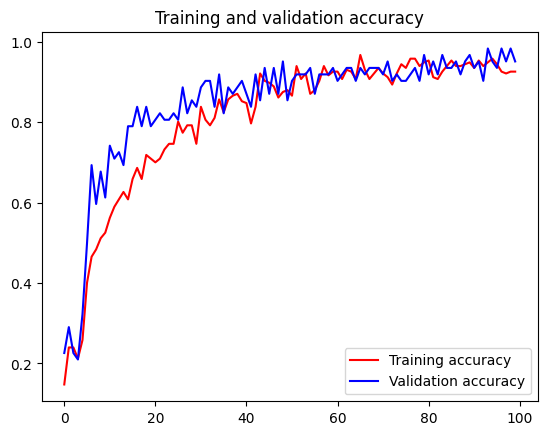

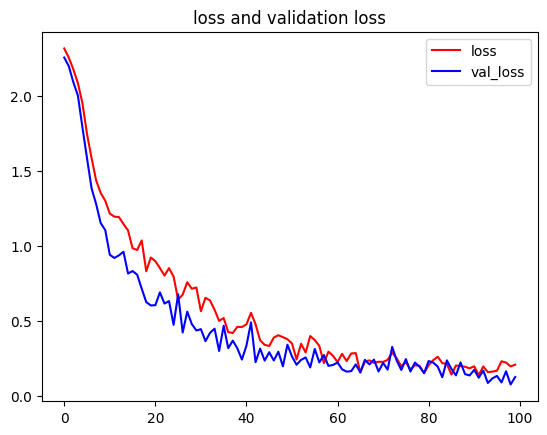

<Figure size 640x480 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5\
    -O /content/Xception_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-12-19 11:11:14--  https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83683744 (80M) [application/octet-stream]
Saving to: ‘/content/Xception_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/Xception_w 100%[===================>]  79.81M  20.5MB/s    in 5.0s    

2023-12-19 11:11:19 (16.1 MB/s) - ‘/content/Xception_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [83683744/83683744]



In [20]:
from tensorflow.keras.applications.xception import Xception

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/content/Xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [21]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = tf.keras.applications.xception.Xception(weights='imagenet',
                              include_top=False,
                              input_shape=(224, 224, 3))

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layers in pre_trained_model.layers:
    layers.trainable = False



  return pre_trained_model

In [22]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.95):
      print("\nReached 95.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [26]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('add_10')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)



  return last_output

In [27]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 728)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 728), dtype=tf.float32, name=None), name='add_10/add:0', description="created by layer 'add_10'")


In [28]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


In [33]:
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense (512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense (10, activation='softmax')(x)
model2 = Model(pre_trained_model.input, x)
model2.summary()

model2.compile(optimizer=keras.optimizers.Adam(0.0001),  # Low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [34]:
callbacks = myCallback()
history = model2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    callbacks = [callbacks]
                    )

Epoch 1/100
7/7 [==============================] - 48s 7s/step - loss: 70.9977 - accuracy: 0.1060 - val_loss: 35.5515 - val_accuracy: 0.2581
Epoch 2/100
7/7 [==============================] - 39s 6s/step - loss: 44.1611 - accuracy: 0.1475 - val_loss: 6.2170 - val_accuracy: 0.4355
Epoch 3/100
7/7 [==============================] - 38s 6s/step - loss: 11.6628 - accuracy: 0.2903 - val_loss: 3.6178 - val_accuracy: 0.4677
Epoch 4/100
7/7 [==============================] - 38s 6s/step - loss: 3.3309 - accuracy: 0.3687 - val_loss: 1.5327 - val_accuracy: 0.4677
Epoch 5/100
7/7 [==============================] - 38s 6s/step - loss: 2.0770 - accuracy: 0.2673 - val_loss: 1.8214 - val_accuracy: 0.3710
Epoch 6/100
7/7 [==============================] - 37s 5s/step - loss: 2.0662 - accuracy: 0.2028 - val_loss: 1.7866 - val_accuracy: 0.4194
Epoch 7/100
7/7 [==============================] - 37s 6s/step - loss: 2.0720 - accuracy: 0.2581 - val_loss: 1.5111 - val_accuracy: 0.5000
Epoch 8/100
7/7 [======

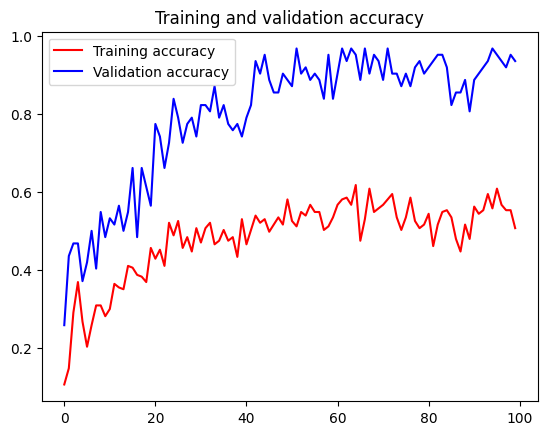

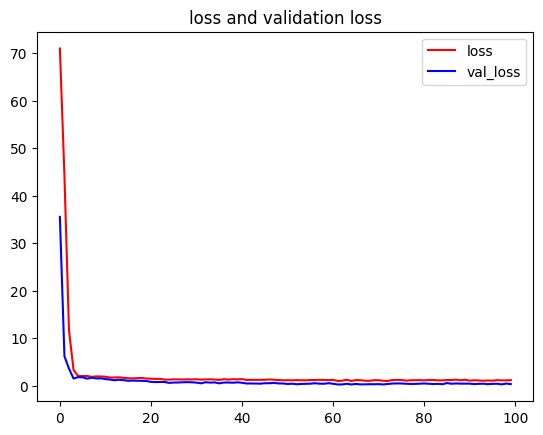

<Figure size 640x480 with 0 Axes>

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [36]:
from tensorflow import keras
pre_trained_model.trainable = True
#model2.summary()

model2.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
                loss = keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy']
)

epochs = 10
model2.fit(train_generator,
           validation_data=validation_generator,
          epochs=epochs
         )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 63s 5s/step - loss: 1.8623 - accuracy: 0.4240 - val_loss: 0.3828 - val_accuracy: 0.9194
Epoch 2/10
7/7 [==============================] - 37s 5s/step - loss: 1.2550 - accuracy: 0.5069 - val_loss: 0.4860 - val_accuracy: 0.8710
Epoch 3/10
7/7 [==============================] - 38s 5s/step - loss: 1.1959 - accuracy: 0.5530 - val_loss: 0.5450 - val_accuracy: 0.8548
Epoch 4/10
7/7 [==============================] - 39s 6s/step - loss: 1.2341 - accuracy: 0.5161 - val_loss: 0.4602 - val_accuracy: 0.9032
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 1.2217 - accuracy: 0.5392 - val_loss: 0.4102 - val_accuracy: 0.9194
Epoch 6/10
7/7 [==============================] - 37s 5s/step - loss: 1.3018 - accuracy: 0.4885 - val_loss: 0.3904 - val_accuracy: 0.9032
Epoch 7/10
7/7 [==============================] - 37s 6s/step - loss: 1.0281 - accuracy: 0.6175 - val_loss: 0.3753 - val_accuracy: 0.9355
Epoch 8/10
7/7 [=============================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
labels = train_generator.class_indices.keys()
uploaded = files.upload()

#for paths in uploaded.keys():

  # predicting images
for paths in uploaded.keys():
  path = paths
  img = image.load_img(path,target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  maxx = proba.max()
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
      print("{}: {:.2f}%".format(label, p * 100))
  for (label, p) in zip(labels, proba):
      if p <= 0.4:
        continue
      elif p == maxx:
          if p<=0.4:
              continue
          elif p>= 0.7:
              print('\nResult: ')
              print(("{}: {:.2f}%".format(label, p* 100)))
          else:
            print('\nlukisan tidak ada!')

In [ ]:
saved_model_path = "./model.h5"

model2.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>